In [37]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt


import jieba
jieba.set_dictionary('dict.txt.big')
with open('stops.txt', 'r', encoding='utf8') as f:
    stops = f.read().split('\n') 
from string import punctuation
stops.extend(punctuation)
stops.extend(['\n', ' ', '使用', '一個'])

from collections import Counter
from wordcloud import WordCloud


In [38]:
url = "https://ithelp.ithome.com.tw/ironman?page=1#ir-list"
res = requests.get(url)  # 先爬下第一頁
soup = BeautifulSoup(res.text, 'lxml')
maxpage = int(soup.select('.pagination')[0].find_all('a')[-2].text)  # 定位出最後一頁的頁數

In [39]:
urls = []
for i in range(maxpage):  # 把接下來要爬的網頁準備好
    page = i + 1
    url = "https://ithelp.ithome.com.tw/ironman?page=" + str(page) + "#ir-list"  # 大家可以觀察每一頁url的變化
    urls.append(url)

In [40]:
# # # try locate elements
# url = "https://ithelp.ithome.com.tw/ironman?page=1#ir-list"
# res = requests.get(url)
# soup = BeautifulSoup(res.text, 'lxml')
# article = soup.select('.ir-list')[0]
# group = article.select('.group-badge__name')[0].text.replace(' ', '').replace('\n', '')
# corpusinfo = article.select('.ir-list__group-topic')[0].text.replace(' ', '').replace('\n', '')
# corpus_title = corpusinfo.split('第')[0]
# corpus_day = re.findall(r'第[\d]+天', corpusinfo)[0].replace('第', '').replace('天', '')
# article_title = article.select('.ir-list__title')[0].text
# article_url = article.select('.ir-list__title')[0].select('a')[0]['href']
# writer_name = article.select('.ir-list__name')[0].text
# writer_url = article.select('.ir-list__user')[0]['href']

# publish_date_str = re.findall(r'於\ .+\ 發表', article.text)[0].replace('於 ', '').replace(' 發表', '')
# publish_date_items = pd.Series(publish_date_str.split('-')).astype(int)
# publish_date = datetime(publish_date_items[0], publish_date_items[1], publish_date_items[2])

# browse_count = re.findall(r'｜.+ 次瀏覽', article.text)[0].replace('｜ ', '').replace(' 次瀏覽', '')

# print(group)
# print(corpus_title)
# print(corpus_day)
# print(article_title)
# print(article_url)
# print(writer_name)
# print(writer_url)
# print(publish_date)
# print(browse_count)

In [41]:
articles_rows = []
for idx, url in enumerate(urls):  ## enumerate這個東西很好用，請大家多多利用
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'lxml')

    articles = soup.select('.ir-list')  ## 找出該頁面的所有文章

    for article in articles:
        article_dict = {}
        group = article.select('.group-badge__name')[0].text.replace(' ', '').replace('\n', '')  ## 定位該篇文章參與比賽的參賽組別
        article_url = article.select('.ir-list__title')[0].select('a')[0]['href']  ## 紀錄該篇文章的網址
        article_dict['group'] = group  
        article_dict['article_url'] = article_url
        articles_rows.append(article_dict)
    
    if idx % 10 == 0:
        print(str(idx) + " pages crawled")

0 pages crawled
10 pages crawled
20 pages crawled
30 pages crawled
40 pages crawled
50 pages crawled
60 pages crawled
70 pages crawled
80 pages crawled
90 pages crawled


In [42]:
df = pd.DataFrame(articles_rows)
df

,article_url,group
0,https://ithelp.ithome.com.tw/articles/10191893,ModernWeb
1,https://ithelp.ithome.com.tw/articles/10191891,SoftwareDevelopment
2,https://ithelp.ithome.com.tw/articles/10191890,SoftwareDevelopment
3,https://ithelp.ithome.com.tw/articles/10191793,自我挑戰組
4,https://ithelp.ithome.com.tw/articles/10191888,ModernWeb
5,https://ithelp.ithome.com.tw/articles/10191849,ModernWeb
6,https://ithelp.ithome.com.tw/articles/10191885,自我挑戰組
7,https://ithelp.ithome.com.tw/articles/10191880,ModernWeb
8,https://ithelp.ithome.com.tw/articles/10191887,ModernWeb
9,https://ithelp.ithome.com.tw/articles/10191886,自我挑戰組


In [274]:
# # try locate content
# # url = 'https://ithelp.ithome.com.tw/articles/10191816'
# # res = requests.get(url)
# soup = BeautifulSoup(res.text, 'lxml')

# like_count = int(soup.select('.likeGroup__num')[0].text)


# header = soup.select('.qa-header')[0]
# corpusinfo = header.select('h3')[0].text.replace(' ', '').replace('\n', '')
# corpus_title = corpusinfo.split('第')[0]
# corpus_day = int(re.findall(r'第[\d]+篇', corpusinfo)[0].replace('第', '').replace('篇', ''))

# article_title = header.select('h2')[0].text.replace(' ', '').replace('\n', '')
# writer_name = header.select('.ir-article-info__name')[0].text.replace(' ', '').replace('\n', '')
# writer_url = header.select('.ir-article-info__name')[0]['href']

# publish_date_str = header.select('.qa-header__info-time')[0]['title']
# date_items = pd.Series(publish_date_str.split(' ')[0].split('-') + publish_date_str.split(' ')[1].split(':')).astype(int)
# publish_date = datetime(date_items[0], date_items[1], date_items[2], date_items[3], date_items[4], date_items[5])

# browse_count = int(re.findall(r'[\d]+', header.select('.ir-article-info__view')[0].text)[0])

# print(like_count)
# print(corpus_title)
# print(corpus_day)
# print(article_title)
# print(writer_name)
# print(writer_url)
# print(publish_date)
# print(browse_count)


# markdown_html = soup.select('.markdown__style')[0]
# text_content = "\n".join([p.text for p in markdown_html.select('p')])

# h1 = [h1.text for h1 in html.select('h1')] if markdown_html.select('h1') != None else []
# h2 = [h2.text for h2 in html.select('h2')] if markdown_html.select('h2') != None else []
# h3 = [h3.text for h3 in html.select('h3')] if markdown_html.select('h3') != None else []
# h4 = [h4.text for h4 in html.select('h4')] if markdown_html.select('h4') != None else []
# h5 = [h5.text for h5 in html.select('h5')] if markdown_html.select('h5') != None else []
# h6 = [h6.text for h6 in html.select('h6')] if markdown_html.select('h6') != None else []


# print(text_content)
# print(h1)
# print(h2)
# print(h3)
# print(h4)
# print(h5)
# print(h6)

In [43]:
def ArticleContentCrawler(row):
    url = row['article_url']
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'lxml')
    
    ## linke count
    like_count = int(soup.select('.likeGroup__num')[0].text)  ## 定位讚的次數

    ## article header
    header = soup.select('.qa-header')[0]
    corpusinfo = header.select('h3')[0].text.replace(' ', '').replace('\n', '')
    corpus_title = corpusinfo.split('第')[0]  ## 定位文章集的的主題
    corpus_day = int(re.findall(r'第[\d]+篇', corpusinfo)[0].replace('第', '').replace('篇', ''))  ## 定位參賽第幾天

    article_title = header.select('h2')[0].text.replace(' ', '').replace('\n', '')  ## 定位文章的title
    writer_name = header.select('.ir-article-info__name')[0].text.replace(' ', '').replace('\n', '')  ## 定位作者名稱
    writer_url = header.select('.ir-article-info__name')[0]['href']  ## 定位作者的個人資訊業面

    publish_date_str = header.select('.qa-header__info-time')[0]['title']  ## 定位發文日期，為了讓日期的格式被讀成python的datetime，所以做了下面很瑣碎的事
    date_items = pd.Series(publish_date_str.split(' ')[0].split('-') + publish_date_str.split(' ')[1].split(':')).astype(int)
    publish_datetime = datetime(date_items[0], date_items[1], date_items[2], date_items[3], date_items[4], date_items[5])

    browse_count = int(re.findall(r'[\d]+', header.select('.ir-article-info__view')[0].text)[0])  ## 定位瀏覽次數
    
    ## markdown_html
    markdown_html = soup.select('.markdown__style')[0]
    text_content = "\n".join([p.text for p in markdown_html.select('p')])  ## 定位所有文章的段落，這邊我懶得爬讀片跟程式碼了
    h1 = [h1.text for h1 in markdown_html.select('h1')]  ## 定位文章的標題們
    h2 = [h2.text for h2 in markdown_html.select('h2')] 
    h3 = [h3.text for h3 in markdown_html.select('h3')]
    h4 = [h4.text for h4 in markdown_html.select('h4')]
    h5 = [h5.text for h5 in markdown_html.select('h5')]
    h6 = [h6.text for h6 in markdown_html.select('h6')]
    
    row['like_count'] = like_count
    
    row['corpus_title'] = corpus_title
    row['corpus_day'] = corpus_day
    row['article_title'] = article_title
    row['writer_name'] = writer_name
    row['writer_url'] = writer_url
    row['publish_datetime'] = publish_datetime
    row['browse_count'] = browse_count
    
    row['text_content'] = text_content
    row['h1'] = h1 if h1 != [] else None
    row['h2'] = h2 if h2 != [] else None
    row['h3'] = h3 if h3 != [] else None
    row['h4'] = h4 if h4 != [] else None
    row['h5'] = h5 if h5 != [] else None
    row['h6'] = h6 if h6 != [] else None
    
    row['crawled_date'] = datetime.now()
    
    return row

df = df.apply(ArticleContentCrawler, axis=1)
df

,article_url,group,like_count,corpus_title,corpus_day,article_title,writer_name,writer_url,publish_datetime,browse_count,text_content,h1,h2,h3,h4,h5,h6,crawled_date
0,https://ithelp.ithome.com.tw/articles/10191893,ModernWeb,0,Nest.jsframework30天初探系列,13,Nestjsframework30天初探:Day13WebSocket-Socket.IO聊...,Michael,https://ithelp.ithome.com.tw/users/20107195/ir...,1513465932000000000,3,小弟我明天速補>< 大家抱歉~~,None,[目送妹嫁出去，萬分不捨><],None,None,None,None,1513466284133671000
1,https://ithelp.ithome.com.tw/articles/10191891,SoftwareDevelopment,0,BPM企業流程-EFGP開發路程系列,13,[Day13]EasyFlowGP--Web表單元件-Button資料選取器,esther1101,https://ithelp.ithome.com.tw/users/20105722/ir...,1513465636000000000,4,昨天提到開視窗的方式，是透過寫語法。\n而EFGP提供另一個好用的元件，就是資料選取器。\n...,None,None,None,None,None,None,1513466285255936000
2,https://ithelp.ithome.com.tw/articles/10191890,SoftwareDevelopment,0,每天Racket3分鐘系列,13,(structiron-man(daytitle))(definetoday(iron-ma...,cchuang0425,https://ithelp.ithome.com.tw/users/20085418/ir...,1513464690000000000,8,雖然標題這麼下，但 Racket 的確有物件導向！今明兩天，我們要介紹 Racket 的抽象...,None,"[1. 有時候你不一定需要物件導向, 2. 資料與資料也有繼承關係, 3. 微妙的 equal]",None,None,None,None,1513466285865398000


In [321]:
from pymongo import MongoClient
conn = MongoClient()
db = conn.ithome_ironman
collection = db.articles
cursor = collection.insert_many(list(df.T.to_dict().values()))

In [3]:
# df.to_csv('ithomeironman.csv', index=False, encoding='utf8')
df = pd.read_csv('ithomeironman.csv')
df

,article_url,group,like_count,corpus_title,corpus_day,article_title,writer_name,writer_url,publish_datetime,browse_count,text_content,h1,h2,h3,h4,h5,h6,crawled_date,content_length
0,https://ithelp.ithome.com.tw/articles/10191843,自我挑戰組,0,網頁學習日誌系列,13,jquery：票價顯示,yuski,https://ithelp.ithome.com.tw/users/20107321/ir...,1513433242000000000,39,想法：\n年底要到台北跟三五好友去跨年，想要搭火車去台北，車票多少錢?\n不用按鈕，直接輸入...,NaN,"['何謂 Express', 'Express-Generator 快速建置環境', 'in...","['安裝 Express-Generator', '初始化專案']","['- Tree', '- 解析 routes/index.js']",NaN,NaN,1513437071230301000,507
1,https://ithelp.ithome.com.tw/articles/10191841,ModernWeb,0,JavaScript基礎二三事系列,13,Day13 物件與物件實體,Simon,https://ithelp.ithome.com.tw/users/20104221/ir...,1513431471000000000,33,今天我們來看物件實體語法object literals\nJS可以透過new Object(...,NaN,"['何謂 Express', 'Express-Generator 快速建置環境', 'in...","['安裝 Express-Generator', '初始化專案']","['- Tree', '- 解析 routes/index.js']",NaN,NaN,1513437071880419000,580
2,https://ithelp.ithome.com.tw/articles/10191840,自我挑戰組,1,GAME30天系列,6,QuasarFrameworkintro.(3/3,我是一支小小小小鳥,https://ithelp.ithome.com.tw/users/20107379/ir...,1513430097000000000,39,"前端開發組件化時代, 我們要學會快速使用組件\n待補",NaN,"['何謂 Express', 'Express-Generator 快速建置環境', 'in...","['安裝 Express-Generator', '初始化專案']","['- Tree', '- 解析 routes/index.js']",NaN,NaN,1513437072586055000,25
3,https://ithelp.ithome.com.tw/articles/10191838,自我挑戰組,1,蚵蚵攻城記系列,6,[Day06]水平置中(2/2)+inlineblock,azer19890427,https://ithelp.ithome.com.tw/users/20107340/ir...,1513428621000000000,46,昨天用了margin: auto 0;\n來達到水平置中，\n今天來試試看用text-ali...,NaN,"['何謂 Express', 'Express-Generator 快速建置環境', 'in...","['安裝 Express-Generator', '初始化專案']","['- Tree', '- 解析 routes/index.js']",NaN,NaN,1513437073082886000,427
4,https://ithelp.ithome.com.tw/articles/10191836,Security,0,資安的學習心得及分享系列,13,DAY13蠕蟲（Worm）,Fu-sheng,https://ithelp.ithome.com.tw/users/20107445/ir...,1513428381000000000,41,什麼是蠕蟲 (Worm) ?\t蠕蟲就像電腦病毒一樣，具有自我複製的程式，但也不完全相同，因...,NaN,"['何謂 Express', 'Express-Generator 快速建置環境', 'in...","['安裝 Express-Generator', '初始化專案']","['- Tree', '- 解析 routes/index.js']",NaN,NaN,1513437073568882000,682
5,https://ithelp.ithome.com.tw/articles/10191825,Security,0,資訊系統安全與CISSP的簡單應用系列,2,[Day02]安全與風險管理(SecurityGovernance),wisdomryanlin,https://ithelp.ithome.com.tw/users/20107753/ir...,1513427687000000000,48,下面會講到很多需求 (Requirements)，記下來的目的是提醒自己應用到系統中喔。關於...,NaN,"['何謂 Express', 'Express-Generator 快速建置環境', 'in...","['安裝 Express-Generator', '初始化專案']","['- Tree', '- 解析 routes/index.js']",NaN,NaN,1513437074409405000,728
6,https://ithelp.ithome.com.tw/articles/10191829,DataTechnology,0,GraphQL+ApolloData入門系列,10,ApolloData&Querymethod(一),polo,https://ithelp.ithome.com.tw/users/20103438/ir...,1513424045000000000,47,介紹\n來介紹ApolloData 基本的查詢，使用ApolloData Client 的話...,NaN,"['何謂 Express', 'Express-Generator 快速建置環境', 'in...","['安裝 Express-Generator', '初始化專案']","['- Tree', '- 解析 routes/index.js']",NaN,NaN,1513437074865355000,649
7,https://ithelp.ithome.com.tw/articles/10191827,ModernWeb,0,ASP.NETMVC網頁程式介紹系列,7,[Day07]ASP.NETMVC後端傳資料到前端介紹(三),小魚,https://ithelp.ithome.com.tw/users/20105694/ir...,1513423608000000000,59,今天繼續前兩天的話題，我們用ViewBag總共傳了三個物件，第一個是C#預設的DateTim...,NaN,"['何謂 Express', 'Express-Generator 快速建置環境', 'in...","['安裝 Express-Generator', '初始化專案']","['- Tree', '- 解析 routes/index.js']",NaN,NaN,1513437075472459000,434
8,https://ithelp.ithome.com.tw/articles/10191831,AI&MachineLearning,0,利用MSBotframework與CognitiveService建構自用智慧小秘書系列,13,13.Azure排程器,DuranHsieh,https://ithelp.ithome.com.tw/users/20091494/ir...,1513422704000000000,75,從前面幾篇文章到現在，我們介紹了許多可以介接的 WebAPI 讓你的機器人可以查詢個人備忘資...,NaN,"['何謂 Express', 'Express-Generator 快速建置環境', 'in...","['安裝 Express-Generator', '初始化專案']","['- Tree', '- 解析 routes/index.js']",NaN,NaN,1513437076017109000,680
9,https://ithelp.ithome.com.tw/articles/10191822,自我挑戰組,0,用laravel尻出自己形狀的linebot，還要撐三十天！系列,11,【第十一天】早安！Slack！,太太,https://ithelp.ithome.com.tw/users/20107380/ir...,1513421645000000000,74,大家早安假日好～原本的LineBot我們先放一旁，來串接看看Slack吧！\n當然不是啦～我...,NaN,"['何謂 Express', 'Express-Generator

In [304]:
df.describe()

,like_count,corpus_day,publish_date,browse_count,crawled_date
count,920.000000,920.000000,9.200000e+02,920.000000,9.200000e+02
mean,0.470652,5.633696,1.512939e+18,583.851087,1.513437e+18
std,0.858427,3.446080,2.995856e+14,310.033560,1.605696e+11
min,0.000000,1.000000,1.512390e+18,33.000000,1.513437e+18
25%,0.000000,3.000000,1.512687e+18,456.750000,1.513437e+18
50%,0.000000,5.000000,1.512951e+18,583.000000,1.513437e+18
75%,1.000000,8.000000,1.513200e+18,683.250000,1.513437e+18
max,6.000000,16.000000,1.513433e+18,3613.000000,1.513438e+18


In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 18 columns):
article_url      920 non-null object
group            920 non-null object
like_count       920 non-null int64
corpus_title     920 non-null object
corpus_day       920 non-null int64
article_title    920 non-null object
writer_name      920 non-null object
writer_url       920 non-null object
publish_date     920 non-null int64
browse_count     920 non-null int64
text_content     920 non-null object
h1               0 non-null object
h2               920 non-null object
h3               920 non-null object
h4               920 non-null object
h5               0 non-null object
h6               0 non-null object
crawled_date     920 non-null int64
dtypes: int64(5), object(13)
memory usage: 129.5+ KB


# Length Stats

In [5]:
df['content_length'] = df['text_content'].astype(str).apply(len)
df['publish_date'] = [str(pd.to_datetime(dt)).split(' ')[0] for dt in df['publish_datetime']]
df.groupby('publish_date').mean()['content_length']

publish_date
2017-12-04    727.565217
2017-12-05    879.032787
2017-12-06    809.750000
2017-12-07    931.529412
2017-12-08    848.926471
2017-12-09    891.183099
2017-12-10    878.813333
2017-12-11    944.987952
2017-12-12    870.783133
2017-12-13    856.363636
2017-12-14    873.576471
2017-12-15    833.988235
2017-12-16    747.076923
Name: content_length, dtype: float64

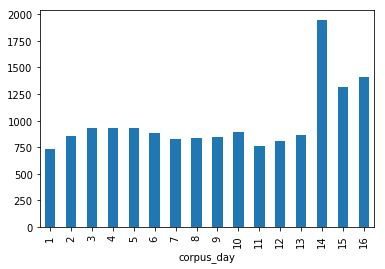

In [15]:
content_length_each_day = df.groupby('corpus_day').mean()['content_length']
content_length_each_day.plot(kind='bar')
plt.show()

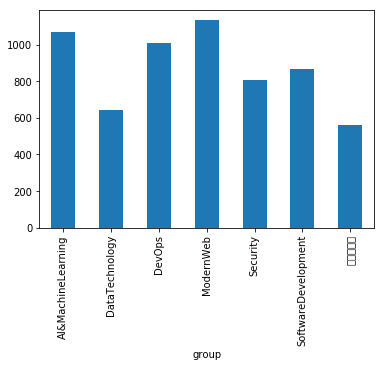

In [18]:
content_length_each_group = df.groupby('group').mean()['content_length']
content_length_each_group.plot(kind='bar')
plt.show()

# browse_count Stats

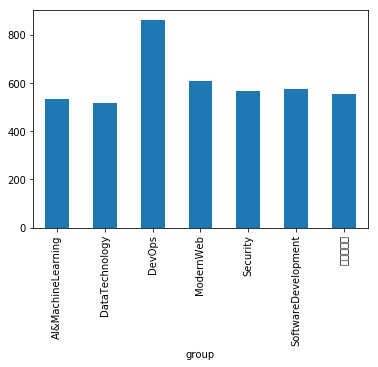

In [26]:
browse_count_each_group = df.groupby('group').mean()['browse_count']
browse_count_each_group.plot(kind='bar')
plt.show()

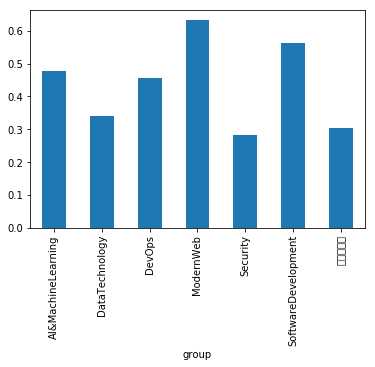

In [27]:
like_count_each_group = df.groupby('group').mean()['like_count']
like_count_each_group.plot(kind='bar')
plt.show()

In [36]:
# df.groupby('group').sum()[['like_count', 'browse_count', 'content_length']]
df.groupby('group').count()

,article_url,like_count,corpus_title,corpus_day,article_title,writer_name,writer_url,publish_datetime,browse_count,text_content,h1,h2,h3,h4,h5,h6,crawled_date,content_length,publish_date
group,,,,,,,,,,,,,,,,,,,
AI&MachineLearning,42,42,42,42,42,42,42,42,42,42,0,42,42,42,0,0,42,42,42
DataTechnology,56,56,56,56,56,56,56,56,56,56,0,56,56,56,0,0,56,56,56
DevOps,33,33,33,33,33,33,33,33,33,33,0,33,33,33,0,0,33,33,33
ModernWeb,320,320,320,320,320,320,320,320,320,315,0,320,320,320,0,0,320,320,320
Security,39,39,39,39,39,39,39,39,39,39,0,39,39,39,0,0,39,39,39
SoftwareDevelopment,139,139,139,139,139,139,139,139,139,139,0,139,139,139,0,0,139,139,139
自我挑戰組,291,291,279,291,291,291,291,291,291,291,0,291,291,291,0,0,291,291,291


In [19]:
df_group_corpus_title = df.groupby(['group', 'corpus_title'])
df_group_first = df_group_corpus_title.first()[['writer_name', 'writer_url']]
df_group_count = df_group_corpus_title.count ()[['article_url']]
df_group_mean = df_group_corpus_title.mean()[['like_count', 'browse_count', 'content_length']]
df_group_max = df_group_corpus_title.max()[['corpus_day']]
df_sorted = df_group_count.join([df_group_first, df_group_mean, df_group_max])
df_sorted.columns = ['article_count', 'writer_name', 'writer_url', 'avg_like_count', 'avg_browse_count', 'avg_article_length', 'max_corpus_day']
df_sorted = df_sorted[['avg_like_count', 'avg_browse_count', 'article_count', 'avg_article_length', 'max_corpus_day', 'writer_name', 'writer_url']]
# df_sorted.to_csv('sorted.csv')
df_sorted

avg_like_count  \
group              corpus_title                                                      
AI&MachineLearning 以100張圖理解NeuralNetwork--觀念與實踐系列                         2.000000   
                   利用MSBotframework與CognitiveService建構自用智慧小秘書系列           0.384615   
                   深度學習環境安裝筆記系列                                           0.000000   
                   玩轉資料與機器學習-以自然語言處理為例系列                                  0.300000   
                   讓我們一起來見見歐美語音助理界的當紅炸子雞-Alexa吧!系列                        0.000000   
DataTechnology     GraphQL+ApolloData入門系列                                 0.700000   
                   Hadoopecosystem工具簡介,安裝教學與各種情境使用系列                      0.461538   
                   MicrosoftBotFramework30天上手系列                           0.444444   
                   Python學習筆記系列                                           0.166667   
                   職場老鳥的資料科學初體驗-R語言專案實作紀錄系列                               0.000000   
DevOps             30天入門Ansible及Jenkins[2018]系列                           0.400000   
                   Nightwatch101：使用Nightwatch實現End-to-EndTesting系列        0.333333   
                   Ops的轉職之路-Puppet從入門就放棄系列                                0.000000   
                   大型敏捷專案的DevOps系列                                        0.000000   
                   用30天來介紹和使用Docker系列                                     0.916667   
ModernWeb          30天串接30個GoogleAPIs的服務應用系列                              0.875000   
                   30天使用Node.js在AWS上開發後端系列                                0.666667   
                   ASP.NETMVC網頁程式介紹系列                                     0.000000   
                   Confluence線上協同作業之平台系列                                  0.000000   
                   Expo---跨平台App開發從零到上架系列                                 0.000000   
                   Go！從無到打造最佳行動網站系列                                       0.600000   
                   JavaScript基礎二三事系列                                      0.384615   
                   Nest.jsframework30天初探系列                                0.416667   
                   Next.js+各種套件組合系列                                       0.923077   
                   PHPlaravel的邂逅系列                                        0.000000   
                   PixiJS，方便好用的WebGL內容產生工具系列                              0.333333   
                   TypeScript-初學之路系列                                      0.250000   
                   TypeScript初學之路系列                                       0.000000   
                   WhatDoestheCodeIgniterSay?系列                           0.000000   
                   ZerotoherowithReact.js系列                               1.111111   
...                                                                            ...   
自我挑戰組              hexo-從初學到入門-again系列                                    0.000000   
                   hexo-從初學到入門系列                                          0.500000   
                   iflen(learning.python)==30:系列                          0.000000   
                   rails學習紀錄系列                                            0.666667   
                   使用PHP串接金流相關API系列                                       1.600000   
                   再戰軟體工程系列                                               0.000000   
                   勇者不冒險，嘴一回桌遊系列                                          0.153846   
                   台灣動漫創作平台開發實錄系列                                         0.000000   
                   如何成為工程師?(從工地到前端工程師)系列                                  0.333333   
                   如何用電商一個月從0賺到100萬系列                                     0.000000   
                   從0開始的菜鳥工程師挑戰賽系列                                        0.000000   
                   從無到有建置一個網站過程byC#mssqlhtml5+javascript系列                0.000000   
                   成長型維運平台-單人新手到多人團隊都適用的工具系列                              0.000000   
                   打雜人生-腦容量不夠用就筆記筆記唄系列                                    0.333333   
                   數位遊牧民族（

In [151]:
for h in ['h1', 'h2', 'h3', 'h4', 'h5', 'h6']:
    print(h, len(df[pd.notnull(df[h])]))
    hs_per_article = df[pd.notnull(df[h])][h]
    all_hs=[]
    for hs in hs_per_article:
        all_hs.extend(hs)
    hLen = pd.Series(all_hs).apply(len)
    print("average length", sum(hLen)/len(hLen))

h1 213
average length 9.94417862839
h2 349
average length 9.85334407736
h3 215
average length 11.894952251
h4 69
average length 14.1789473684
h5 15
average length 11.5
h6 11
average length 52.0909090909


# Header Words Count Stats

In [191]:
def tokenize(sentence):
    terms = []
    for term in jieba.cut(sentence):
        terms.append(term.lower())
    return terms
    
df_title = df[['article_title']] 
df_title['processed'] = df_title['article_title'].apply(tokenize)
df_title

c:\users\jeremy\appdata\local\programs\python\python35\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,article_title,processed
0,ApolloData & Query method (一),"[apollodata, , &, , , query, , method, , ..."
1,[Day 07] ASP.NET MVC後端傳資料到前端介紹(三),"[[, day, , 07, ], , asp, ., net, , mvc, 後, ..."
2,13. Azure 排程器,"[13, ., , azure, , 排程器]"
3,【第十一天】早安！Slack！,"[【, 第十一天, 】, 早安, ！, slack, ！]"
4,(Day12)取出有幫助的分詞資料,"[(, day12, ), 取出, 有, 幫助, 的, 分詞, 資料]"
5,4.1是否指派適當權責之高階主管負責資訊安全管理系統之協調、推動及督導等事項？,"[4.1, 是否, 指派, 適當, 權責, 之, 高階, 主管, 負責, 資訊, 安全, 管..."
6,JavaScript Function 與 Hoisting,"[javascript, , function, , 與, , hoisting]"
7,ERP改來改去何時了~顧問沒教過怎麼辦？,"[erp, 改來改去, 何時, 了, ~, 顧問, 沒教過, 怎麼辦, ？]"
8,CCNA-vlan切割(下),"[ccna, -, vlan, 切割, (, 下, )]"
9,[Day 05] 深度學習環境安裝筆記 — 安裝 Nvidia 驅動程式,"[[, day, , 05, ], , 深度, 學習, 環境, 安裝, 筆記, , —..."


In [192]:
total_terms = []
for terms in df_title['processed']:
    total_terms.extend(terms)
sorted(dict(Counter(total_terms)).items(), key=lambda x:x[1], reverse=True)

[(' ', 2245),
 ('-', 412),
 ('day', 233),
 ('的', 229),
 ('[', 209),
 (']', 209),
 ('(', 158),
 (')', 158),
 ('.', 128),
 (':', 127),
 ('與', 87),
 ('：', 71),
 ('1', 56),
 ('，', 56),
 ('、', 48),
 ('？', 46),
 ('&', 45),
 ('js', 45),
 ('2', 44),
 ('天', 43),
 ('javascript', 41),
 ('介紹', 40),
 ('安裝', 38),
 ('css', 37),
 ('之', 35),
 ('我', 33),
 ('】', 31),
 ('【', 31),
 ('3', 30),
 ('工具', 30),
 ('30', 28),
 ('學習', 27),
 ('"', 26),
 ('?', 26),
 ('是', 26),
 ('用', 26),
 ('day1', 26),
 ('｜', 25),
 ('day2', 25),
 ('環境', 24),
 ('\u3000', 24),
 ('開發', 23),
 ('day3', 23),
 ('react', 22),
 ('day4', 22),
 ('—', 22),
 ('應用', 21),
 ('資料', 21),
 ('服務', 21),
 ('4', 21),
 ('什麼', 21),
 ('5', 20),
 ('（', 20),
 ('資訊', 20),
 ('使用', 20),
 ('和', 20),
 ('設定', 20),
 ('10', 20),
 ('day5', 20),
 ('！', 20),
 ('vue', 19),
 ('!', 19),
 ('#', 19),
 ('01', 19),
 ('爬蟲', 19),
 ('第', 19),
 ('framework', 19),
 ('_', 19),
 ('pixijs', 18),
 ('02', 18),
 ('03', 18),
 ('網路', 17),
 ('簡介', 17),
 ('系統', 17),
 ('所', 17),
 ('一', 17),
 (

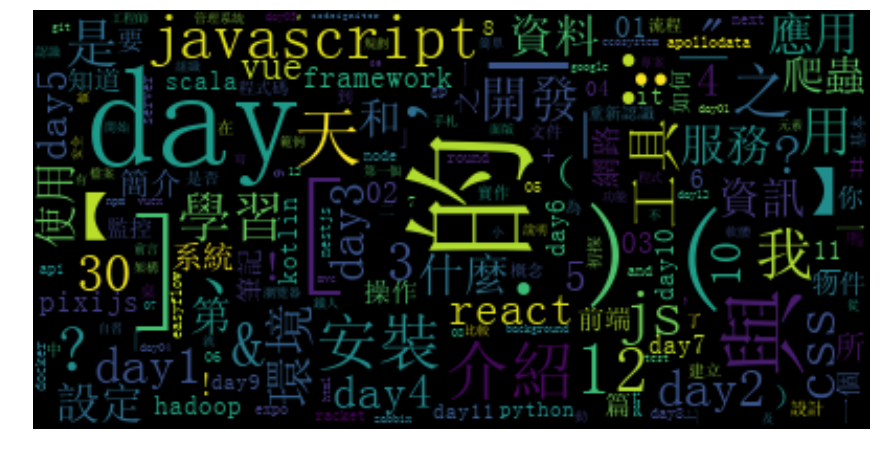

In [193]:

wordcloud = WordCloud(font_path="simsun.ttf")
wordcloud.generate_from_frequencies(frequencies=Counter(total_terms))
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Content Words Count Stats

In [180]:
def tokenize(sentence):
    terms = []
    for term in jieba.cut(sentence):
        term = term.lower()
        if term not in stops:
            terms.append(term)
    return terms

df_content = df[['text_content']] 
df_content['processed'] = df_content['text_content'].apply(tokenize)
df_content

Building prefix dict from D:\Projects\ithomecrawler\dict.txt.big ...
Loading model from cache C:\Users\Jeremy\AppData\Local\Temp\jieba.u6431cddb42ecbeb0ce699d474911aa67.cache
Loading model cost 1.433 seconds.
Prefix dict has been built succesfully.
c:\users\jeremy\appdata\local\programs\python\python35\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,text_content,processed
0,介紹\n來介紹ApolloData 基本的查詢，使用ApolloData Client 的話...,"[介紹, 介紹, apollodata, 查詢, 使用, apollodata, clien..."
1,今天繼續前兩天的話題，我們用ViewBag總共傳了三個物件，第一個是C#預設的DateTim...,"[今天, 繼續, 前兩天, 話題, viewbag, 總共, 三個, 物件, 第一個, c#..."
2,從前面幾篇文章到現在，我們介紹了許多可以介接的 WebAPI 讓你的機器人可以查詢個人備忘資...,"[從前, 面, 幾篇, 文章, 現在, 介紹, 許多, 介接, webapi, 機器人, 查..."
3,大家早安假日好～原本的LineBot我們先放一旁，來串接看看Slack吧！\n當然不是啦～我...,"[早安, 假日, 好, 原本, linebot, 先放, 一旁, 串接, 看看, slack..."
4,接下來，回到本專案的正題，直接把先前爬出的第一層議題欄位，餵進去處理。\n江~江~ 結果就是...,"[回到, 專案, 正題, 直接, 先前, 爬, 第一層, 議題, 欄位, 處理, 江, 江,..."
5,這星期為了法律事項而頭痛不已，我個人覺得，大家不在乎法令，出事的時候，拿了些不該用的法令出來...,"[星期, 法律, 事項, 頭痛, 覺得, 不在乎, 法令, 出事, 些, 不該, 法令, 找..."
6,Hoisting 在 JavaScript 僅是一個觀念，主要是在說明變數、函式在宣告期間就...,"[hoisting, javascript, 僅是, 一個, 觀念, 主要, 說明, 變數,..."
7,有時在iT邦會看到很有意思的提問，\n有邦友發願想要為公司開發系統，想問問有沒有好建議？\n...,"[有時, it, 邦, 看到, 有意思, 提問, 有邦友, 發願, 想要, 公司, 開發, ..."
8,子網路切割神器，操作方式相當簡單\n輸入ip跟mask就可以算出了\n繼續回去上CCNA課\n,"[子, 網路, 切割, 神器, 操作, 方式, 相當, 簡單, 輸入, ip, mask, ..."
9,一般裝 Nvidia 顯卡驅動有兩種方法，一種是到 Nvidia 官網下載 .run fil...,"[裝, nvidia, 顯卡, 驅動, 兩種, 方法, 一種, nvidia, 官網, 下載..."


In [182]:
total_terms = []
for terms in df_content['processed']:
    total_terms.extend(terms)
sorted(dict(Counter(total_terms)).items(), key=lambda x:x[1], reverse=True)

[('一個', 2195),
 ('使用', 2073),
 ('中', 1078),
 ('做', 939),
 ('資料', 894),
 ('程式', 797),
 ('後', 787),
 ('寫', 760),
 ('需要', 758),
 ('時', 720),
 ('執行', 685),
 ('設定', 662),
 ('好', 633),
 ('方式', 591),
 ('變數', 578),
 ('物件', 569),
 ('再', 561),
 ('問題', 557),
 ('介紹', 548),
 ('程式碼', 535),
 ('javascript', 526),
 ('比較', 514),
 ('js', 513),
 ('功能', 500),
 ('透過', 490),
 ('開發', 490),
 ('安裝', 489),
 ('先', 485),
 ('檔案', 483),
 ('元素', 460),
 ('下', 448),
 ('看到', 442),
 ('一些', 437),
 ('一下', 433),
 ('方法', 428),
 ('網頁', 428),
 ('之後', 427),
 ('直接', 420),
 ('時間', 415),
 ('宣告', 410),
 ('人', 408),
 ('內容', 401),
 ('簡單', 397),
 ('範例', 392),
 ('說', 387),
 ('資訊', 385),
 ('想', 384),
 ('屬性', 384),
 ('專案', 377),
 ('文章', 376),
 ('知道', 375),
 ('html', 371),
 ('今天', 371),
 ('部分', 370),
 ('應該', 365),
 ('提供', 365),
 ('建立', 362),
 ('語言', 358),
 ('最', 358),
 ('值', 356),
 ('技術', 355),
 ('工具', 350),
 ('公司', 346),
 ('css', 344),
 ('函式', 344),
 ('docker', 341),
 ('已經', 340),
 ('所有', 323),
 ('定義', 323),
 ('裡面', 322),
 ('以下', 321),
 

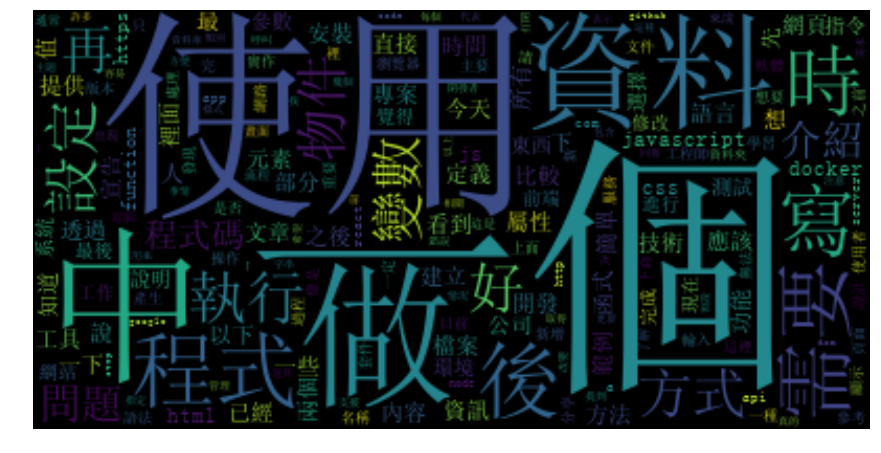

In [189]:
wordcloud = WordCloud(font_path="simsun.ttf")
wordcloud.generate_from_frequencies(frequencies=Counter(total_terms))
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Categorical Ctontent Wrods Count Stats

DataTechnology


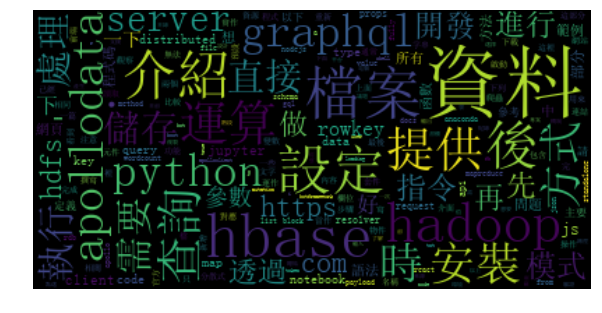

DevOps


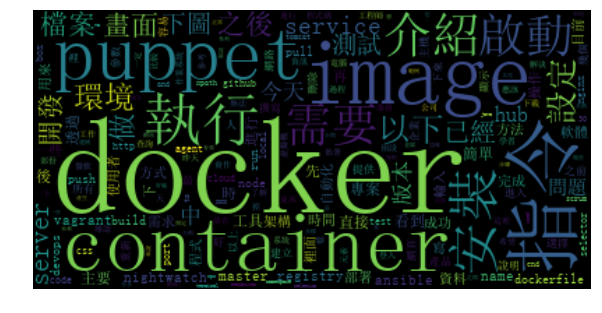

Security


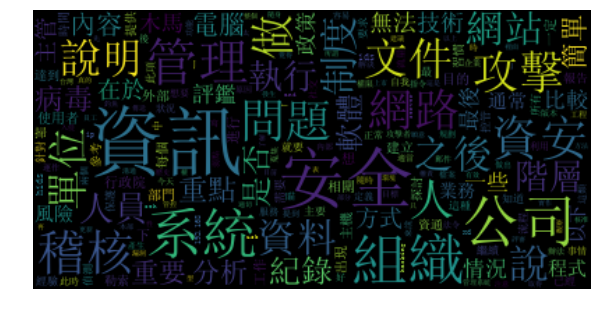

SoftwareDevelopment


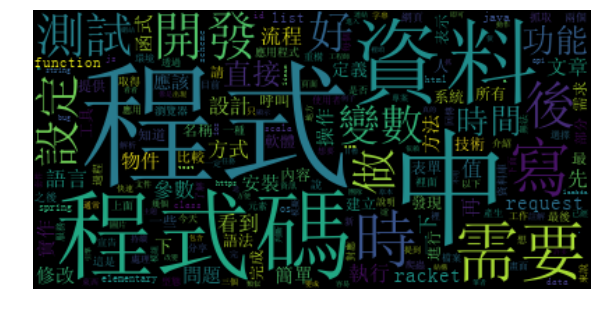

自我挑戰組


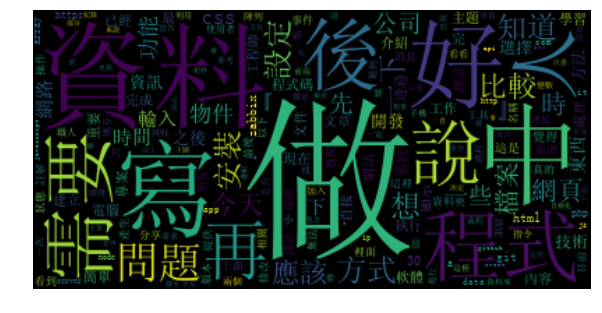

AI&MachineLearning


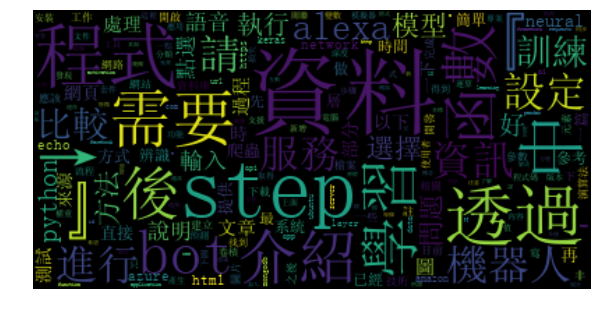

ModernWeb


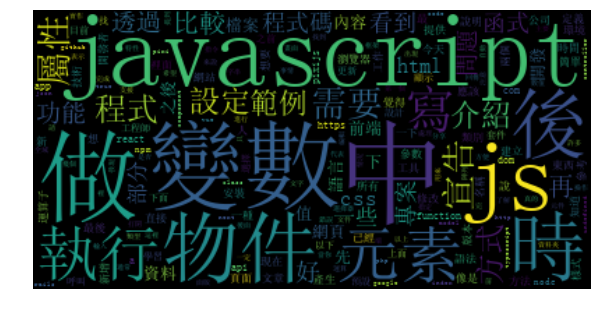

In [202]:
def tokenize(sentence):
    terms = []
    for term in jieba.cut(sentence):
        term = term.lower()
        if term not in stops:
            terms.append(term)
    return terms

for g in set(df['group']):
    print(g)
    df_content = df[df['group'] == g][['text_content']]
    df_content['processed'] = df_content['text_content'].apply(tokenize)
    total_terms = []
    for terms in df_content['processed']:
        total_terms.extend(terms)
        
    wordcloud = WordCloud(font_path="simsun.ttf")
    wordcloud.generate_from_frequencies(frequencies=Counter(total_terms))
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()